## Import the relevant libraries

In [111]:
# import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas_profiling as pp
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

## Load the data

In [11]:
Raw_Data = pd.read_csv("Input/HeartDisease/heart.csv")

In [16]:
print(Raw_Data.shape)
Raw_Data.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
Raw_Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Preprocessing

In [17]:
pp.ProfileReport(Raw_Data, title = ' Profiling Report', html = {'style':{'full_width': True}})

## Analyse Feature in Dependence on the Target Variable

In [220]:
#Separate Categorical and Numerical Features
FeatureNames = Raw_Data.columns
FeatureNames = FeatureNames[:-1]
Numerical_Feature = ['age','trestbps','chol','thalach','oldpeak']
Categorical_Feature = ['sex', 'cp','fbs','restecg', 'exang','slope','ca','thal']
print("Numerical:", len(Numerical_Feature))
print("Categorical:",len(Categorical_Feature))

Numerical: 5
Categorical: 8


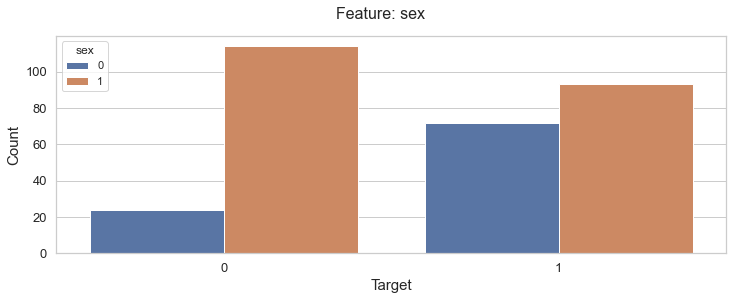

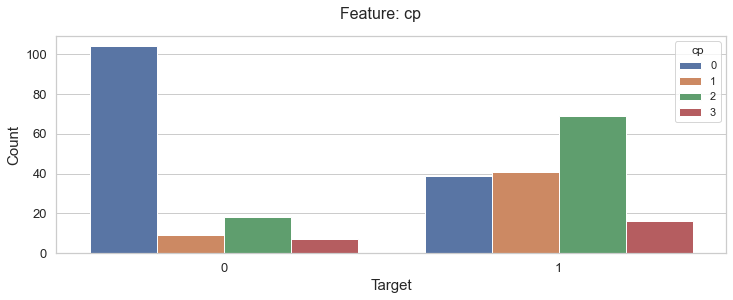

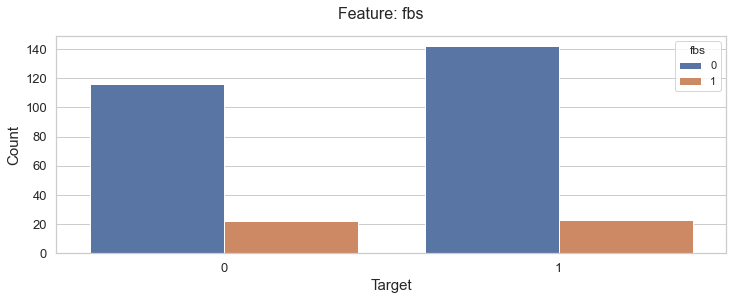

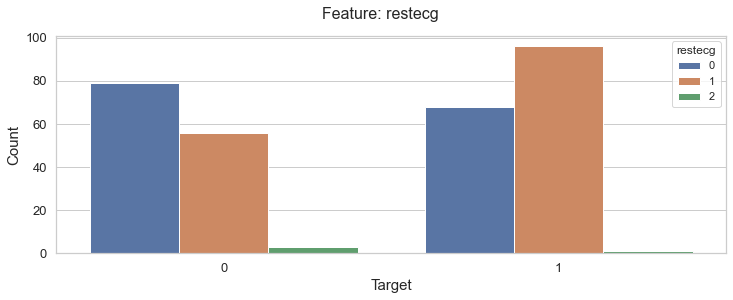

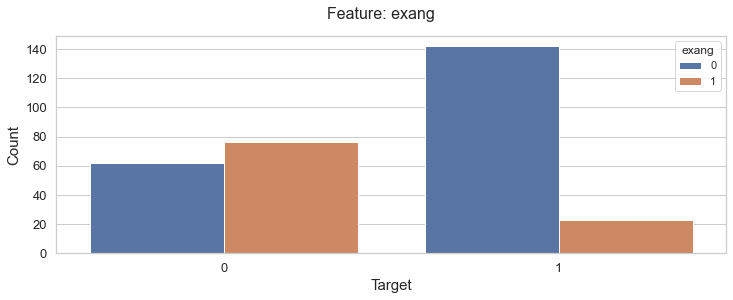

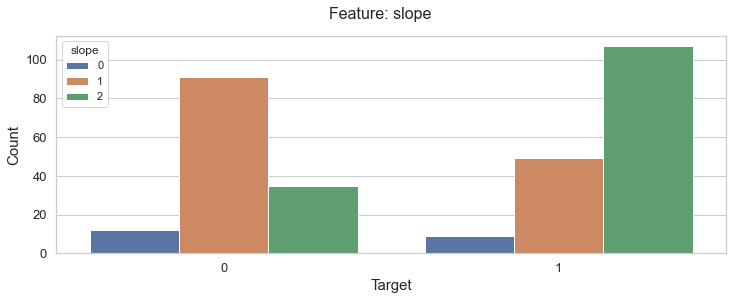

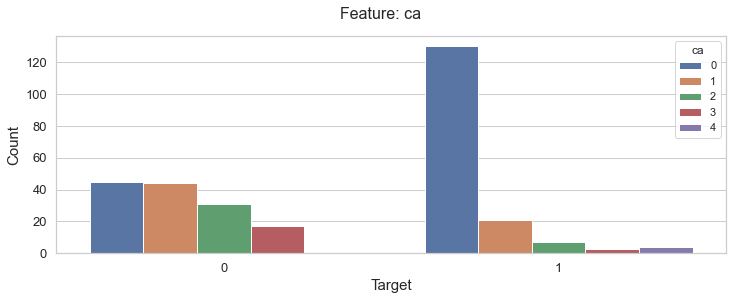

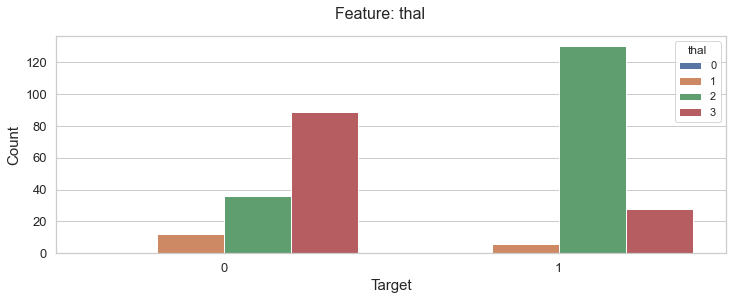

In [221]:
Label_Size = 15
Ticks_Size = 13
for i in range(0, len(Categorical_Feature)):
      title = "Feature: " + Categorical_Feature[i] 
      plt.figure(figsize=(12,4))
      plt.suptitle(title, fontsize=16)
      ax = sns.countplot(x="target",hue=Categorical_Feature[i], data=Raw_Data)
      #Size of ticks and Labels
      ax.set_xlabel('Target', fontsize = Size_Font)
      ax.set_ylabel('Count', fontsize = Size_Font)
      ax.tick_params(axis='both', labelsize = Ticks_Size)
      plt.show()


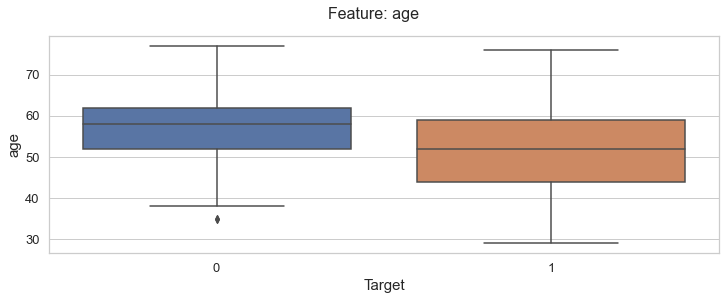

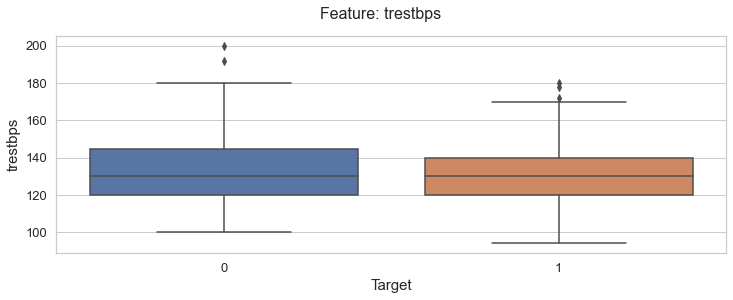

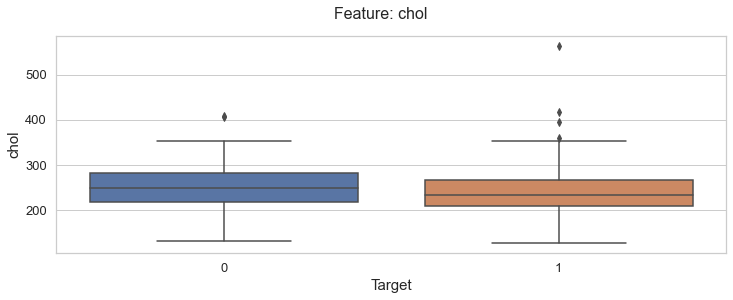

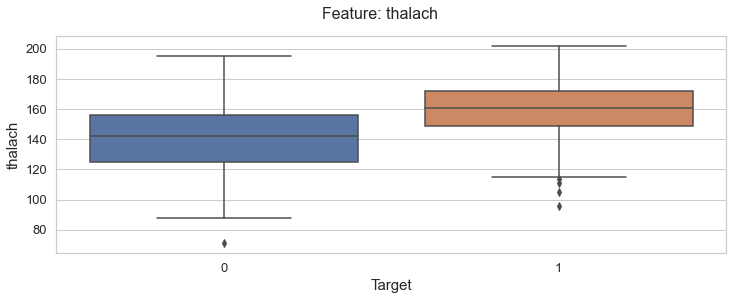

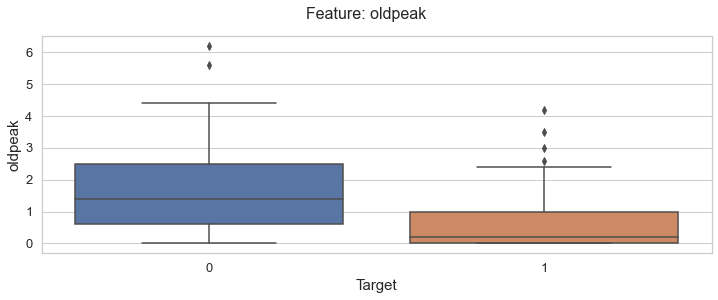

In [222]:
Label_Size = 15
Ticks_Size = 13
for i in range(0, len(Numerical_Feature)):
      title = "Feature: " + Numerical_Feature[i] 
      plt.figure(figsize=(12,4))
      plt.suptitle(title, fontsize=16)
      ax = sns.boxplot(x="target", y=Numerical_Feature[i], data=Raw_Data)
      #Size of ticks and Labels
      ax.set_xlabel('Target', fontsize = Size_Font)
      ax.set_ylabel( Numerical_Feature[i], fontsize = Size_Font)
      ax.tick_params(axis='both', labelsize = Ticks_Size)
      plt.show()


## Separate Training and Testing Data

In [223]:
Df_Feature = Raw_Data.loc[:, Raw_Data.columns != "target"]
X = np.array(Df_Feature)
y = np.array(Raw_Data["target"])
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [293]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(242, 13)

In [300]:
print("Training Data - Samples:", len(y_train))
print("Class 1:", np.count_nonzero(y_train))
print("Balance:")
print(np.count_nonzero(y_train)/len(y_train), "%")
print("\nTest Data - Samples:",len(y_test))
print("Class 1:", np.count_nonzero(y_test))
print("Balance:")
print(np.count_nonzero(y_test)/len(y_test), "%")

Training Data - Samples: 242
Class 1: 133
Balance:
0.5495867768595041 %

Test Data - Samples: 61
Class 1: 32
Balance:
0.5245901639344263 %


## Standardizing the Data

In [301]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

X_train

array([[-1.35679832,  0.72250438,  0.00809909, ...,  0.95390513,
        -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912, ..., -0.69498803,
        -0.68970073, -0.50904773],
       ...,
       [ 1.58263146,  0.72250438,  1.96807914, ..., -0.69498803,
         0.32186034, -0.50904773],
       [-0.92132724,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [ 0.92942484, -1.38407465,  0.00809909, ...,  0.95390513,
         1.33342142, -0.50904773]])

## Calculate Feature Importance with Random Forest

In [302]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [303]:
#SelectFromModel will select those features which importance is greater 
#than the mean importance of all the features by defaul
forest = RandomForestClassifier(n_estimators = 1000, random_state = 0)
forest.fit(X_train, y_train)
#selection
sel = SelectFromModel(forest, prefit = True)
# sel.fit(X_train, y_train)
FeatureImportance = sel.get_support() #Returns an array with Booleans (True,False) -> True: for Features, whose importance greater than the mean importance


In [304]:
feat_importances = pd.Series(forest.feature_importances_, index=FeatureNames)
frame = {'Feature_Name': FeatureNames, 'Relative_Importance': feat_importances } 
df_FeatureImportance = pd.DataFrame(frame)
print(df_FeatureImportance)

             Feature_Name  Relative_Importance
Feature_Name                                  
chol                 chol             0.089765
sex                   sex             0.037511
thalach           thalach             0.110041
thal                 thal             0.072790
age                   age             0.079080
restecg           restecg             0.009828
fbs                   fbs             0.018997
trestbps         trestbps             0.108817
exang               exang             0.071854
cp                     cp             0.128213
slope               slope             0.048783
oldpeak           oldpeak             0.129252
ca                     ca             0.095069


MeanScore Relative_Importance    0.076923
dtype: float64


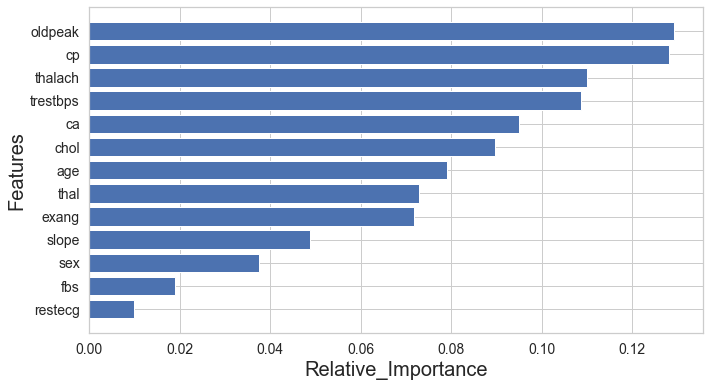

In [305]:
# SOrtiere Score
FeatureScores_Sorted = df_FeatureImportance.sort_values(by=['Relative_Importance'], ascending=False)
FeatureNames = FeatureScores_Sorted["Feature_Name"]
FeatureScores = FeatureScores_Sorted["Relative_Importance"]

Size_Font = 20
Legend_Size_Font = 14
Ticks_Size_Font = 14

fig, ax = plt.subplots(figsize=(11,6))
ax.barh(FeatureNames, FeatureScores,  align='center')
ax.tick_params( axis='both', labelsize = Ticks_Size_Font)   

ax.invert_yaxis() 

ax.set_xlabel("Relative_Importance",fontsize = Size_Font)

ax.set_ylabel("Features",fontsize = Size_Font)

print("MeanScore", np.mean(FeatureScores_Sorted))

## Hyperparameters of the Models

In [306]:
#Support Vector Machine
C_range = np.logspace(-2,2,5)
gamma_range = np.logspace(-2, 2, 5)
print(C_range)
print(gamma_range)

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


## Training of the Models

In [311]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
#SupportVector Maschine
clf = svm.SVC()
grid_values = [
  {'C': C_Values, 'gamma': gamma_range, 'kernel': ['rbf']},
#   {'C': C_Values, 'kernel': ['linear']}
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,cv = 5, n_jobs = -1, verbose = 10,return_train_score = True)

best_clf = grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
print("Optimized Hyperparameters", best_clf.best_params_)

y_pred = best_clf.predict(X_test)



Fitting 5 folds for each of 65 candidates, totalling 325 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1701s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0402s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0826s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0927s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 298 t

Optimierte Hyperparameter SVC(C=10.0, gamma=0.01)
Optimierte Hyperparameter {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 313 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 325 out of 325 | elapsed:    4.3s finished


In [315]:
# New Model Evaluation metrics 

print("Model Evaluation with best Parameters")
print("Train Score\n")
print("ACC:", best_clf.score(X_train, y_train))

print("Test Score\n")
print(classification_report(y_test,y_pred, digits=4))
print(confusion_matrix(y_test,y_pred))


Model Evaluation with best Parameters
Train Score

ACC: 0.8925619834710744
Test Score

              precision    recall  f1-score   support

           0     0.8333    0.8621    0.8475        29
           1     0.8710    0.8438    0.8571        32

    accuracy                         0.8525        61
   macro avg     0.8522    0.8529    0.8523        61
weighted avg     0.8531    0.8525    0.8525        61

[[25  4]
 [ 5 27]]
